In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys

sys.path.append('../')
sys.path.append('../OneWayShootingTPS/scripts')
import matplotlib_config as cfg
import fnmatch
from matplotlib import cm as cmpl
from matplotlib.colors import PowerNorm

from cmap import Colormap
import cmasher as cmr
import matplotlib.colors as mcolors 
from matplotlib.colors import LogNorm

In [2]:
cm_name = 'crameri:acton'
cm_name = 'seaborn:rocket'


cm = Colormap(f'{cm_name}')
mpl_cm = cm.to_mpl().reversed()

cmap_colors = mpl_cm(np.linspace(0, 1, 256))
truncate_point = 0.1

truncated_colors = cmap_colors[int(256 * truncate_point):]
cmap = mcolors.LinearSegmentedColormap.from_list('truncated_cmap', truncated_colors)

In [3]:
plt.rcParams.update({
    # 'font.family': 'sans-serif',
    # 'font.sans-serif': ['Arial', 'Helvetica', 'sans-serif'],
    'font.family': 'serif',  # Use a LaTeX-compatible serif font
    'font.serif': ['Computer Modern Roman'],  # Match LaTeX's default font
    'figure.figsize': (10, 6),
    'figure.dpi': 100,
    'text.usetex': True,
    'font.size': 18,
    'axes.labelsize': 24,
    'axes.titlesize': 26,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24,
    'legend.fontsize': 24,
})

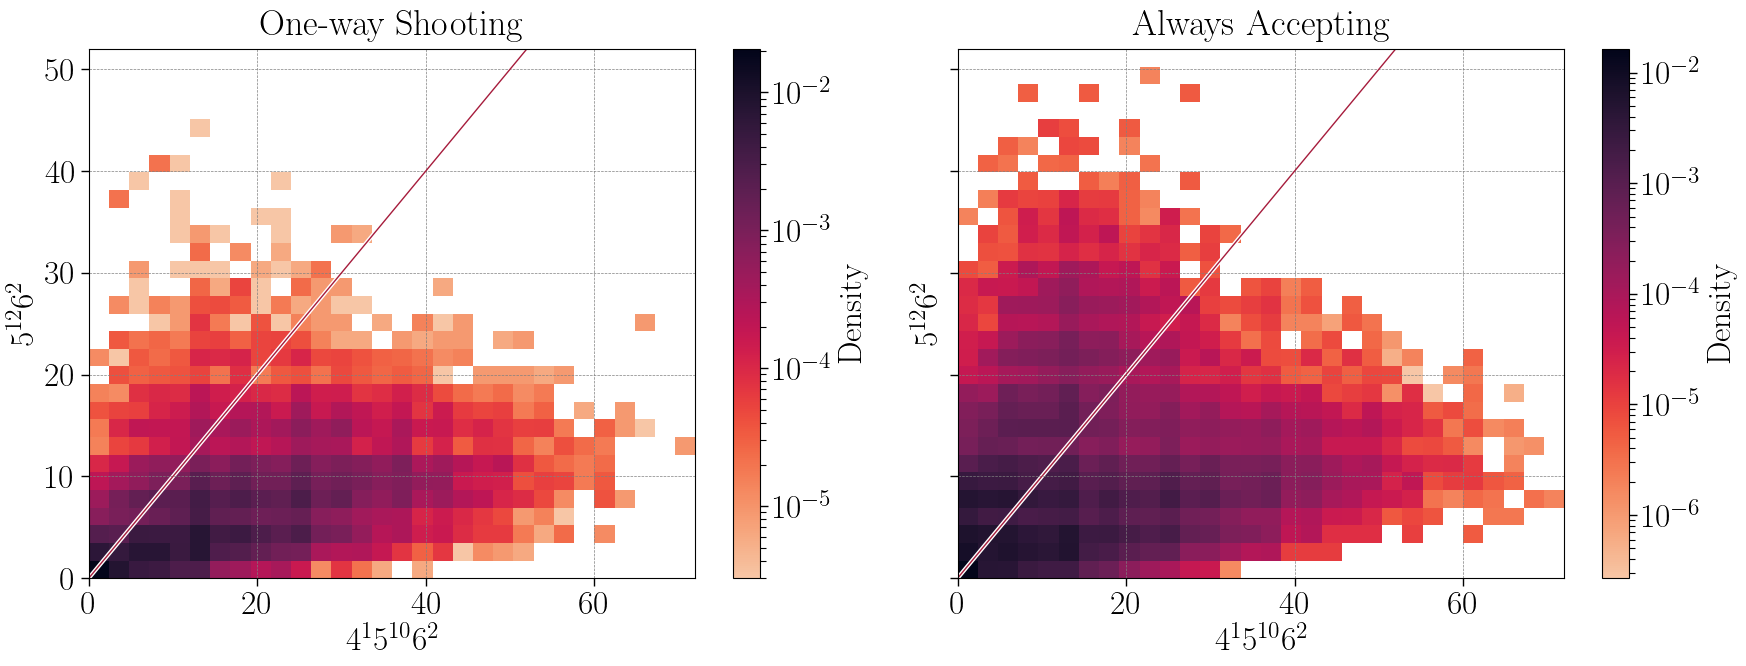

In [4]:
data_1w = np.load('data/1wS_histogram_data.npz')
counts_1w = data_1w['counts']
xedges_1w = data_1w['xedges']
yedges_1w = data_1w['yedges']

data_AA = np.load('data/AAA_histogram_data.npz')
counts_AA = data_AA['counts']
xedges_AA = data_AA['xedges']
yedges_AA = data_AA['yedges']

fig, axs = plt.subplots(1, 2, figsize=(18, 7), sharex=True, sharey=True)

masked_counts_1w = np.ma.masked_where(counts_1w == 0, counts_1w)
X1w, Y1w = np.meshgrid(xedges_1w, yedges_1w, indexing="ij")
im1 = axs[0].pcolormesh(X1w, Y1w, masked_counts_1w, cmap=cmap, norm=LogNorm())
axs[0].plot(np.arange(100), np.arange(100), color=cfg.colors['red'], lw = 1, zorder = 2)
axs[0].plot(np.arange(100), np.arange(100), color='white', lw = 3, zorder = 1)
axs[0].set_title('One-way Shooting', pad = 10)
axs[0].set_xlabel(r'$4^15^{10}6^2$')
axs[0].set_ylabel(r'$5^{12}6^2$')
fig.colorbar(im1, ax=axs[0], label='Density')

masked_counts_AA = np.ma.masked_where(counts_AA == 0, counts_AA)
XAA, YAA = np.meshgrid(xedges_AA, yedges_AA, indexing="ij")
im2 = axs[1].pcolormesh(XAA, YAA, masked_counts_AA, cmap=cmap, norm=LogNorm())
axs[1].plot(np.arange(100), np.arange(100), color=cfg.colors['red'], lw = 1, zorder = 2)
axs[1].plot(np.arange(100), np.arange(100), color='white', lw = 3, zorder = 1)
axs[1].set_title('Always Accepting', pad = 10)
axs[1].set_xlabel(r'$4^15^{10}6^2$')
axs[1].set_ylabel(r'$5^{12}6^2$')  # Optional since shared
fig.colorbar(im2, ax=axs[1], label='Density')

axs[0].set_xlim(0, 72)
axs[0].set_ylim(0, 52)

plt.tight_layout()
plt.savefig('../figures/structure_analysis_histogram_subfigures.png')
plt.show()

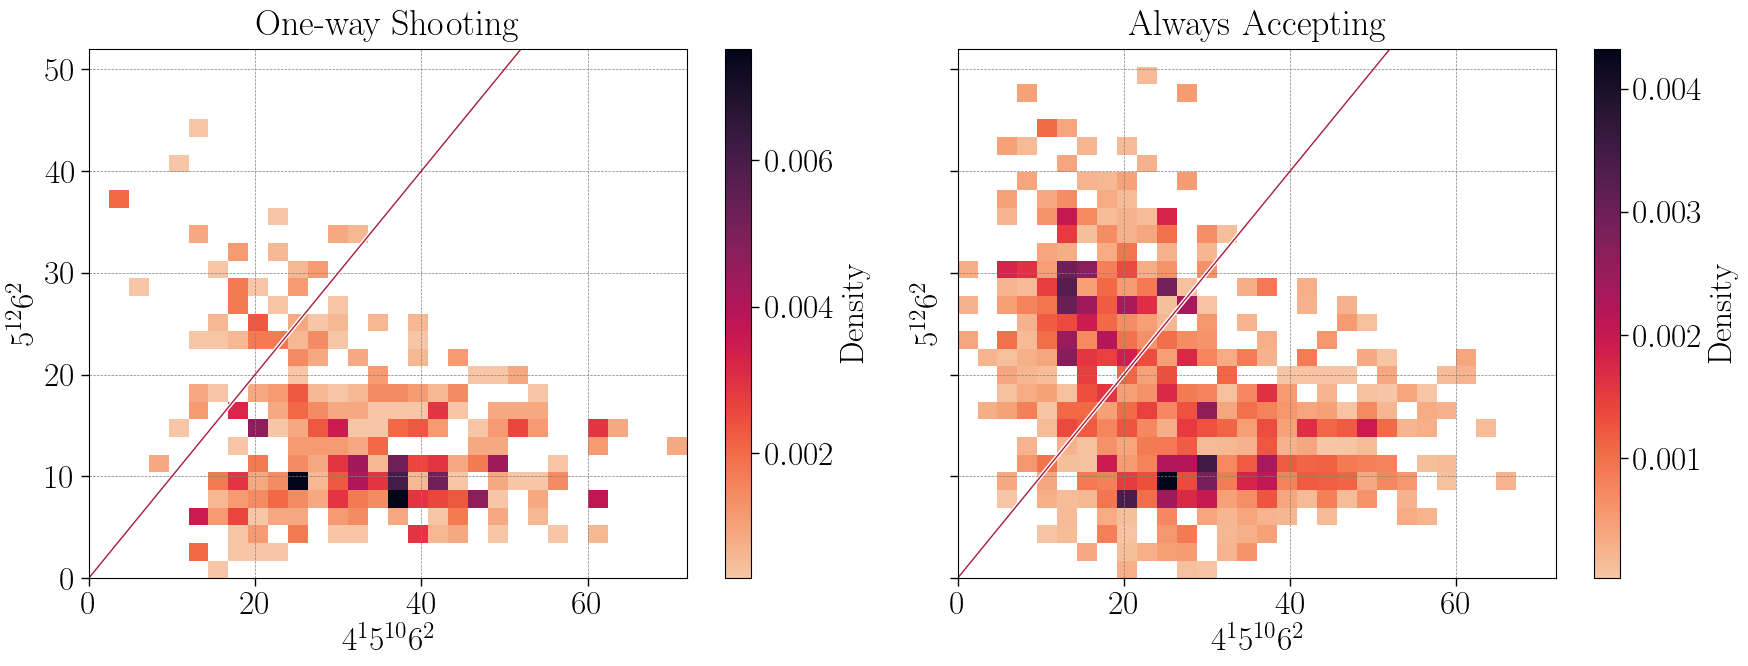

In [5]:
data_1w = np.load('data/1wS_histogram_data_endpoints.npz')
counts_1w = data_1w['counts']
xedges_1w = data_1w['xedges']
yedges_1w = data_1w['yedges']

data_AA = np.load('data/AAA_histogram_data_endpoints.npz')
counts_AA = data_AA['counts']
xedges_AA = data_AA['xedges']
yedges_AA = data_AA['yedges']

fig, axs = plt.subplots(1, 2, figsize=(18, 7), sharex=True, sharey=True)

masked_counts_1w = np.ma.masked_where(counts_1w == 0, counts_1w)
X1w, Y1w = np.meshgrid(xedges_1w, yedges_1w, indexing="ij")
im1 = axs[0].pcolormesh(X1w, Y1w, masked_counts_1w, cmap=cmap)
axs[0].plot(np.arange(100), np.arange(100), color=cfg.colors['red'], lw = 1, zorder = 2)
axs[0].plot(np.arange(100), np.arange(100), color='white', lw = 3, zorder = 1)
axs[0].set_title('One-way Shooting', pad = 10)
axs[0].set_xlabel(r'$4^15^{10}6^2$')
axs[0].set_ylabel(r'$5^{12}6^2$')
fig.colorbar(im1, ax=axs[0], label='Density')

masked_counts_AA = np.ma.masked_where(counts_AA == 0, counts_AA)
XAA, YAA = np.meshgrid(xedges_AA, yedges_AA, indexing="ij")
im2 = axs[1].pcolormesh(XAA, YAA, masked_counts_AA, cmap=cmap)
axs[1].plot(np.arange(100), np.arange(100), color=cfg.colors['red'], lw = 1, zorder = 2)
axs[1].plot(np.arange(100), np.arange(100), color='white', lw = 3, zorder = 1)
axs[1].set_title('Always Accepting', pad = 10)
axs[1].set_xlabel(r'$4^15^{10}6^2$')
axs[1].set_ylabel(r'$5^{12}6^2$')  # Optional since shared
fig.colorbar(im2, ax=axs[1], label='Density')

axs[0].set_xlim(0, 72)
axs[0].set_ylim(0, 52)

plt.tight_layout()
plt.savefig('../figures/CageHistograms/structure_analysis_histogram_endpoints.png')
plt.show()

In [6]:
plt.rcParams.update({
    'font.size': 18,
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 16,
    'legend.frameon': False,
    'axes.grid': False,
    'font.family': ['sans-serif']
})
cm_name = 'crameri:acton'
cm_name = 'seaborn:rocket'


cm = Colormap(f'{cm_name}')
mpl_cm = cm.to_mpl().reversed()

cmap_colors = mpl_cm(np.linspace(0, 1, 256))
truncate_point = 0.1

truncated_colors = cmap_colors[int(256 * truncate_point):]
cmap = mcolors.LinearSegmentedColormap.from_list('truncated_cmap', truncated_colors)

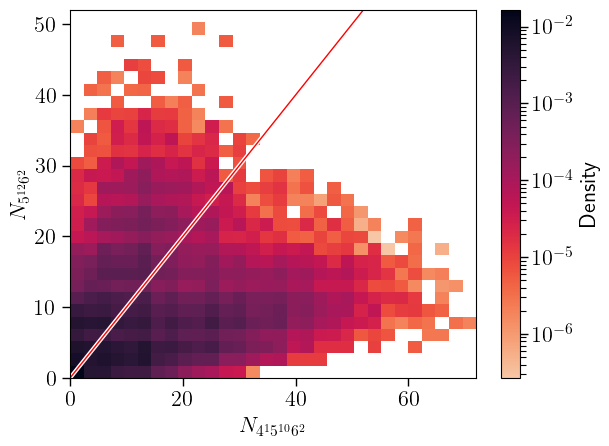

In [7]:
data_AA = np.load('data/AAA_histogram_data_endpoints.npz')
counts_AA = data_AA['counts']
xedges_AA = data_AA['xedges']
yedges_AA = data_AA['yedges']


data_AA = np.load('data/AAA_histogram_data.npz')
counts_AA = data_AA['counts']
xedges_AA = data_AA['xedges']
yedges_AA = data_AA['yedges']


fig, ax = plt.subplots(figsize=(6.45, 4.8))  # Single plot

masked_counts_AA = np.ma.masked_where(counts_AA == 0, counts_AA)
XAA, YAA = np.meshgrid(xedges_AA, yedges_AA, indexing="ij")
im = ax.pcolormesh(XAA, YAA, masked_counts_AA, cmap=cmap, norm=LogNorm())

# Diagonal overlay
ax.plot(np.arange(100), np.arange(100), color='red', lw=1, zorder=2)
ax.plot(np.arange(100), np.arange(100), color='white', lw=3, zorder=1)

# Labels and title
ax.set_xlabel(r'$N_{4^15^{10}6^2}$')
ax.set_ylabel(r'$N_{5^{12}6^2}$')

# Colorbar
fig.colorbar(im, ax=ax, label='Density')

# Define range of C values to draw lines for
C_values = [70, 85]

# Get plotting range from axis limits
x_min, x_max = ax.get_xlim()
x_vals = np.linspace(x_min, x_max, 500)

'''
for C in C_values:
    y_vals = C - x_vals
    ax.plot(x_vals, y_vals, linestyle='--', color='black', linewidth=1, alpha=0.6)
    
    # Choose a visible point within axis limits to place label
    x_label = 5  # Choose small x for top-left labeling
    y_label = C - x_label
    
    if 0 <= y_label <= 52:  # Only label if within y-limits
        ax.text(x_label, y_label, f'${C}$', fontsize=16, color='black',
                rotation=0)#, va='bottom', ha='left', alpha=0.8)
'''
# Axes limits
ax.set_xlim(0, 72)
ax.set_ylim(0, 52)

plt.tight_layout()
plt.savefig('../figures/CageHistograms/structure_analysis_histogram_AAonly.png')
plt.show()


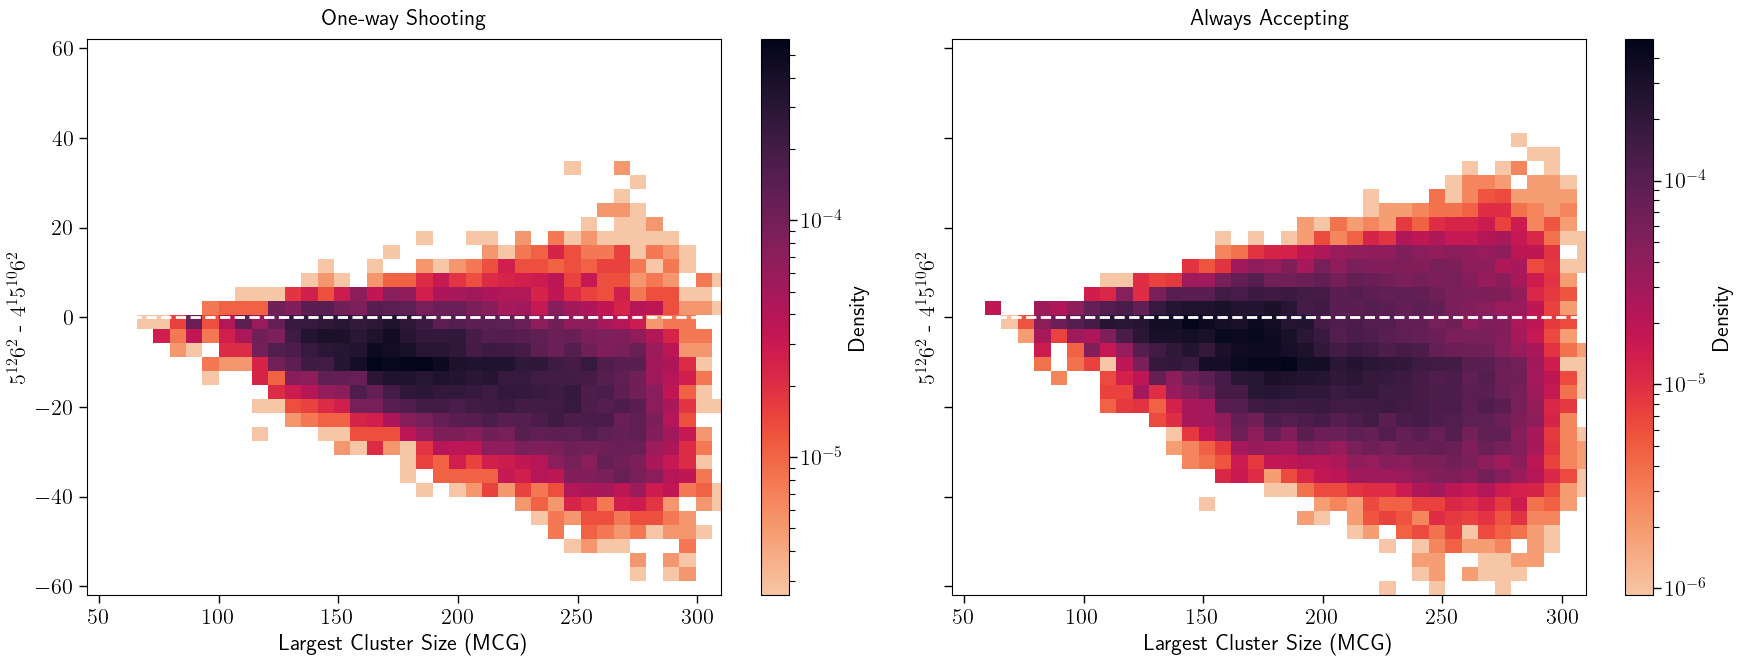

In [8]:
data_1w = np.load('data/1wS_cr_vs_mcg.npz')
counts_1w = data_1w['counts']
xedges_1w = data_1w['xedges']
yedges_1w = data_1w['yedges']

data_AA = np.load('data/AAA_cr_vs_mcg.npz')
counts_AA = data_AA['counts']
xedges_AA = data_AA['xedges']
yedges_AA = data_AA['yedges']

fig, axs = plt.subplots(1, 2, figsize=(18, 7), sharex=True, sharey=True)

masked_counts_1w = np.ma.masked_where(counts_1w == 0, counts_1w)
X1w, Y1w = np.meshgrid(xedges_1w, yedges_1w, indexing="ij")
im1 = axs[0].pcolormesh(X1w, Y1w, masked_counts_1w, cmap=cmap, norm=LogNorm())
axs[0].axhline(0, c = 'white', linestyle = '--')
axs[0].set_title('One-way Shooting', pad = 10)
axs[0].set_xlabel(r'Largest Cluster Size (MCG)')
axs[0].set_ylabel(r'$5^{12}6^2$ - $4^15^{10}6^2$')
fig.colorbar(im1, ax=axs[0], label='Density')

masked_counts_AA = np.ma.masked_where(counts_AA == 0, counts_AA)
XAA, YAA = np.meshgrid(xedges_AA, yedges_AA, indexing="ij")
im2 = axs[1].pcolormesh(XAA, YAA, masked_counts_AA, cmap=cmap, norm=LogNorm())
axs[1].axhline(0, c = 'white', linestyle = '--')
axs[1].set_title('Always Accepting', pad = 10)
axs[1].set_xlabel(r'Largest Cluster Size (MCG)')
axs[1].set_ylabel(r'$5^{12}6^2$ - $4^15^{10}6^2$')  # Optional since shared
fig.colorbar(im2, ax=axs[1], label='Density')

axs[0].set_xlim(45, 310)
axs[0].set_ylim(-62, 62)

plt.tight_layout()
plt.savefig('../figures/CageHistograms/cr_vs_mcg.png')
plt.show()